# Bank - Attritionanalysis

#### Daten einlesen

In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt

path = "data/"
dataframes = []
for csv_file in os.listdir(path):
    if csv_file.endswith(".csv"):
        dataframes.append(pd.read_csv(path + csv_file, sep="|"))

df = pd.concat(dataframes, ignore_index=True)

print(df.shape)

### Kontrolle des zusammengefügten DataFrames

- Summe aller Zeilen der csv-Dateien
- Spaltenanzahl (Features)
- Ausgabe der Features

In [2]:
# path = "data/"
# sum_rows = 0
# for csv_file in os.listdir(path):
#     df = pd.read_csv(path + csv_file, sep="|")
#     sum_rows += df.shape[0]

# print(f"Summe der Zeilen aller csv-Dateien: {sum_rows}\nAnzahl der Features (Spalten): {df.shape[1]}\n{df.dtypes}")

### Erste Identifikation von Datenproblemen

#####Analyse der Spalten mit dem Datentyp object (string)

In [ ]:
def get_unique_objects():
    features = df.columns.values
    for feature in features:
        if df[feature].values.dtype not in [int, float]:
            df.drop_duplicates(inplace=True)
            print(f"{df[feature].name}\n{df[feature].unique()}")
          
#get_unique_objects()
df["gender"] = df["gender"].str.lower()
df["gender"] = df["gender"].replace("f", "female").replace("m", "male")
df["gender"] = df["gender"].fillna(df["gender"].mode()[0])
get_unique_objects()


##### Analyse der numerischen Spalten

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6))

age = df["age"]

ax.boxplot([age])
ax.set_ylabel('Age (in years)')
ax.set_xticklabels(['Alter'])
ax.set_title('Box Plot: Age Feature')
plt.show()

print(f"Min Age: {df["age"].min()}\nMax Age: {df['age'].max()}\nAvg Age: {round(df['age'].mean(), 2)}")

###  [AT09] Identifikation von Ausreißern beim Kreditscore

Als Business möchte ich wissen, ob in dem Datensatz numerische Ausreißer existieren. Bitte wählen Sie eine geeignete Visualisierungsmethode, um den Kreditscore zu analysieren. Info: Sofern Ausreißer in der Spalte existieren, analysieren Sie, ob es sich um inhaltlich korrekte Werte handelt oder ob diese zu bereinigen sind (wenn ja, in welcher Form).

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))

credit_score = df["credit_score"]

ax.boxplot(credit_score)
ax.set_title("Spalte credit_score")
ax.set_ylabel("Credit Score")
ax.set_xticklabels(["credit_score"])

Aus dem Boxplot erkennen wir 2 Outlier, einen Maximum-Outlier und einen Minimum-Outlier. Der Minimum-Outlier ist unter 0, das sieht inhaltlich falsch aus, aber der Maximum-Outlier könnte durchaus korrekt sein.

Schauen wir uns diese an.
Den min_credit_score ersetzen wir mit dem Median der credit_scores.

In [ ]:
min_credit_score = df["credit_score"].min()
max_credit_score = df["credit_score"].max()

df["credit_score"] = df["credit_score"].replace(min_credit_score, df["credit_score"].median())

#df.boxplot(column="credit_score", figsize=(3,6))

fig, ax = plt.subplots(figsize=(3,6))

credit_score = df["credit_score"]

ax.boxplot(credit_score)
ax.set_title("Spalte credit_score")
ax.set_ylabel("Credit Score")
ax.set_xticklabels(["credit_score"])

Wir sehen, der Minimum Ausreißer wurde entfernt.

### [AT10] Verteilung der Balance je Land

Als Business möchte ich wissen, wie die numerische Verteilung der Balance basierend auf dem Land des Kunden zu bewerten ist. Interpretieren Sie zusätzlich die Ergebnisse. Was kann ich als Business mit dem Ergebnis anfangen? Tipp: Verwenden Sie ein BoxPlot zur Visualisierung der Balance je Land.

Zuerst müssen wir wissen, welche Länder es gibt, danach erstellen wir länderspezifische Listen, die nur die Balance-Werte eines Landes enthalten.

In [7]:
balance = df["balance"]
countries = df["country"].unique()

countries
# Ausgabe: array(['France', 'Germany', 'Spain'], dtype=object)

fra_balance = df.loc[(df["country"] == "France"), "balance"]
ger_balance = df.loc[(df["country"] == "Germany"), "balance"]
spa_balance = df.loc[(df["country"] == "Spain"), "balance"]

Wir sehen, dass es keine Fehlerhaften werte wie "-" oder NaN in "country" gibt.
Nun visualisieren wir diese Ergebnisse und erstellen für jedes Land ein Boxplot.

In [ ]:
fig, ax = plt.subplots(dpi=200)

ax.boxplot([fra_balance, ger_balance, spa_balance])
ax.set_title("Verteilung der Balance je Land")
ax.set_xticklabels(["Frankreich", "Deutschland", "Spanien"])
ax.set_ylabel("Balance")
ax.axhline(ger_balance.median(), linestyle=":")
plt.show()

print(f"Datenpunkte für:\n- Deutschland: {len(ger_balance)}\n- Frankreich: {len(fra_balance)}\n- Spanien: {len(spa_balance)}")

Aus dem Plot können wir ableiten:
+ Deutsche haben bei dieser Bank im Durchschnitt mehr Geld auf ihrem Konto, als Kunden aus Frankreich oder Spanien.
+ In Frankreich und Spanien haben die Kunden etwa gleich viel Geld auf ihren Konten.
+ In Deutschland gibt es mehr Kunden, die besonders viel Geld auf ihrem Konto haben, als in Frankreich oder Spanien, weil die Daten stärker getreut sind.
+ Der deutsche Median-Kunde hat fast mehr Geld auf seinem Konto wie 75% der Kunden in Frankreich oder Spanien.

--> Zinsen auf das Konton könnten bei Deutschen Kunden für die Bank teurer sein. Angenommen in jedem Land sind die Zinsen bei 3% p.a., dann kann man Kosten begrenzen, indem man in Deutschland den Zinssatz auf 2,5% p.a. einstellt. Das ist dann ein Land, in dem sich das Risiko, Kunden zu verlieren lohnt, da dort die Zinsen auch teuerer sind.

Allgemein können mit den Infos des Plots Handlungsempfehlungen wie diese erstellt werden.

Man muss allerdings auf die Datenqualität aufpassen, da es für Frankreich doppelt so viele Datensätze gibt, wie für die beiden anderen Länder.

### [AT11] Verteilung der Balance zu Verfügbarkeit einer Kreditkarte

Als Business möchte ich wissen, wie sich die Balance der Kunden abhängig von der Existenz einer Kreditkarte unterscheidet. Wählen Sie eine geeignete Visualisierung und interpretieren Sie diese. (Info: Überprüfen Sie, ob leere Felder in den Attributen existieren. Wenn ja, schlagen Sie ein mögliches Vorgehen vor, um diese zu behandeln)

Identifizierung von der credit_card Spalte
In einem Zusammenhang bringen mit der Balance 

Könnte wieder durch Boxplots dargestellt werden, einen für Leute mit Karte und einen ohne Karte.

In [ ]:
credit_card = df["credit_card"]
balance = df["balance"]

credit_card.unique()
# array([ 1.,  0., nan])

credit_card = df["credit_card"].fillna(df["credit_card"].median())
credit_card.unique()
credit_card.shape
# array([1., 0.])

balance_with_credit_card = df.loc[credit_card == 1, "balance"]
balance_witohut_credit_card = df.loc[credit_card == 0, "balance"]

print(f"Anzahl Kunden mit credit_card: {len(balance_with_credit_card)}\nAnzahl Kunden ohne credit_card: {len(balance_witohut_credit_card)}")

empty_balance = df.loc[df["balance"].isna() == True, "balance"]
empty_balance
# Series([], Name: balance, dtype: float64)

Es gab NaN-Werte bei der credit_card Spalte, aber nicht bei der Balance. Dort gibt es zwar 0, das ist aber ein realistischer Wert.

/var/folders/3f/l9j4nxj16_92j7_bpgb5q8bm0000gp/T/ipykernel_9652/1161130250.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["Kreditkarte"])
/var/folders/3f/l9j4nxj16_92j7_bpgb5q8bm0000gp/T/ipykernel_9652/1161130250.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Keine Kreditkarte"])


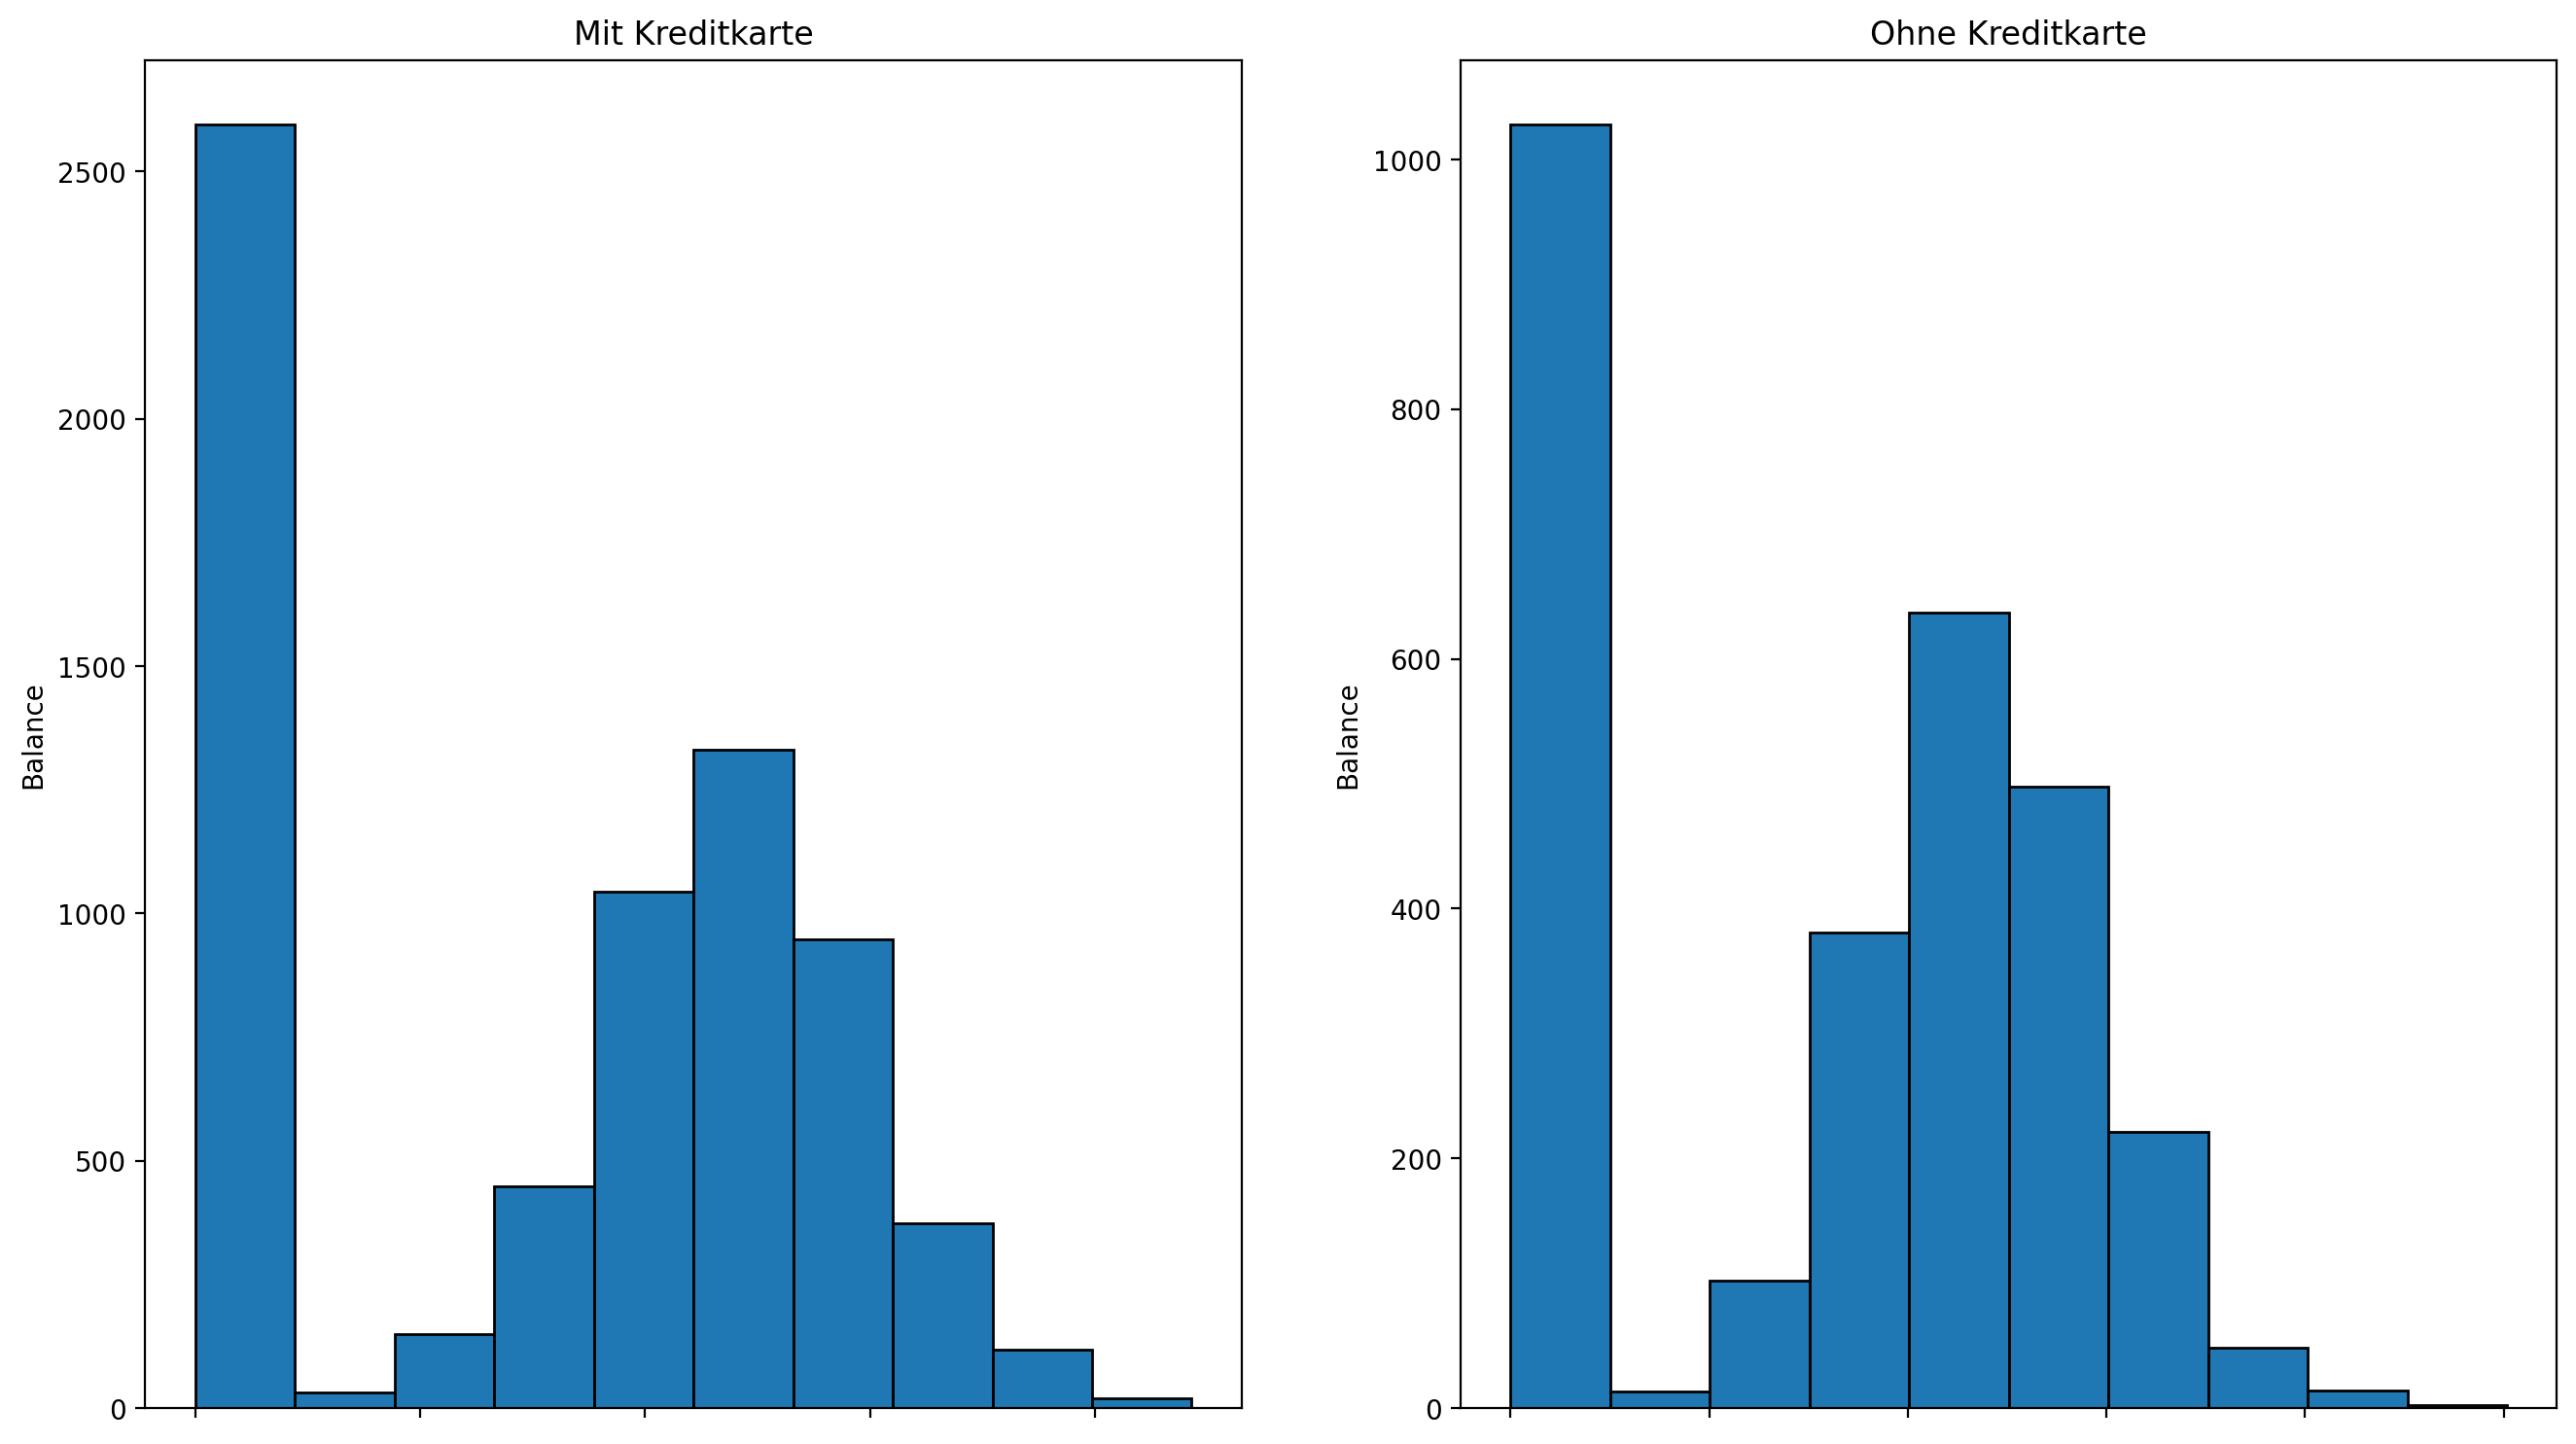

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(16,9), dpi=200)

ax[0].hist([balance_with_credit_card], edgecolor="black")
ax[0].set_title("Mit Kreditkarte")
ax[0].set_ylabel("Balance")
ax[0].set_xticklabels(["Kreditkarte"])
#ax[0].axhline(balance_with_credit_card.m)

ax[1].hist([balance_witohut_credit_card], edgecolor="black")
ax[1].set_title("Ohne Kreditkarte")
ax[1].set_ylabel("Balance")
ax[1].set_xticklabels(["Keine Kreditkarte"])
plt.show()